# Import Library

In [ ]:
import pandas as pd
from nltk.tokenize import word_tokenize
import emoji
import re
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize
from transformers import pipeline
from langdetect import detect
from langdetect.lang_detect_exception import LangDetectException
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [467]:
df_data = pd.read_csv('../data/data.csv')
df_data.head()

,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/
2,10/18/2025,SHINE AQUA ILLUSION ??????,Adam Ellis,INSTAGRAM,77386,222,77608,4.70%,1.82913E+16,1.996713e+07,https://www.instagram.com/p/DP95XWvkTjB/
3,10/1/2025,"You guys are always saying I don’t age (I do, ...",Victoria Justice,INSTAGRAM,60296,1097,61393,0.25%,1.80667E+16,8.326823e+06,https://www.instagram.com/reel/DPRbze0ERKq/
4,10/24/2025,Bring the Hello Kitty x belif Aqua Bomb Eye Ge...,belif North America,INSTAGRAM,60695,45,60740,40.21%,1.80861E+16,1.640148e+09,https://www.instagram.com/p/DQM_zTWki5e/


# Preprocessing

In [ ]:
def preprocessing(teks):
    if not isinstance(teks, str):
        teks = str(teks)

    # Menghilangkan Emotikon
    teks_tanpa_kode = emoji.demojize(teks)
    teks = re.sub(r':\S+:', ' ', teks_tanpa_kode).strip()
    
    # Normalisasi ke huruf kecil
    teks = teks.lower()

    # Pemisahan Hashtag
    hashtag_pattern = r'#(\w+)'
    
    # Ekstrak semua hashtag
    hashtags_list = re.findall(hashtag_pattern, teks)
    
    # Hapus semua kemunculan hashtag dari teks asli
    teks_bersih = re.sub(hashtag_pattern, '', teks).strip() 

    # Menghilangkan Tanda Baca dan Angka
    teks_bersih = re.sub(r'[^a-z\s]', '', teks_bersih)
    
    # Membersihkan spasi berlebih
    teks_bersih = re.sub(r'\s+', ' ', teks_bersih).strip()
    
    return teks_bersih, hashtags_list

results = df_data['Message'].apply(preprocessing)
df_data[['messege_processed', 'hashtags']] = pd.DataFrame(results.tolist(), index=df_data.index)

df_data

,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[]
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak yang dilakukan oleh gubernur...,"[muslimvox, voxofmuslim]"
2,10/18/2025,SHINE AQUA ILLUSION ??????,Adam Ellis,INSTAGRAM,77386,222,77608,4.70%,1.82913E+16,1.996713e+07,https://www.instagram.com/p/DP95XWvkTjB/,shine aqua illusion,[]
3,10/1/2025,"You guys are always saying I don’t age (I do, ...",Victoria Justice,INSTAGRAM,60296,1097,61393,0.25%,1.80667E+16,8.326823e+06,https://www.instagram.com/reel/DPRbze0ERKq/,you guys are always saying i dont age i do but...,"[belifpartner, belifeyegel, koreanskincare, am..."
4,10/24/2025,Bring the Hello Kitty x belif Aqua Bomb Eye Ge...,belif North America,INSTAGRAM,60695,45,60740,40.21%,1.80861E+16,1.640148e+09,https://www.instagram.com/p/DQM_zTWki5e/,bring the hello kitty x belif aqua bomb eye ge...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,10/24/2025,"ปังหรือพัง?! สรุปดราม่าชุด ""โจวตงอวี่"" ในงานพร...",ข่าวสารบันเทิงจีน,FACEBOOK,530,140,725,0.30%,1111684889022048_1386022306222245,1.111680e+15,https://www.facebook.com/690290085795474/posts...,vogue vogue china th anniversary grand event v...,"[ช, ไม, ช, ใครท, โจวตงอว, zhoudongyu, vogue20,..."
495,10/12/2025,☀️ MSC NEW for 2027! MSC Meraviglia in Southam...,Hays Travel,FACEBOOK,659,16,713,0.15%,213229724687_1239571384873759,2.132300e+11,https://www.facebook.com/655475886616648/posts...,msc new for msc meraviglia in southampton ulti...,[]
496,10/16/2025,Bangkok’s Best Meets Beachfront Bliss! ??\n\nE...,Beach House Layan,INSTAGRAM,707,2,709,17.80%,1.81031E+16,1.784150e+16,https://www.instagram.com/p/DP3JpjiATGh/,bangkoks best meets beachfront bliss experienc...,[]
497,10/11/2025,Thu hồi phiếu công bố của hơn 20 mỹ phẩm nhập ...,Bác sĩ của bạn,FACEBOOK,376,17,681,0.06%,531586226913351_1275166171317670,5.315860e+14,https://www.facebook.com/570168591817435/posts...,thu hi phiu cng b ca hn m phm nhp khu c c kem ...,[]


In [ ]:
# Deteksi bahasa teks

def is_indonesian(text):
    if isinstance(text, list):
        text = ' '.join(text)
        
    if len(str(text)) < 5: 
        return True 
        
    try:
        return detect(str(text)) == 'id'
    except LangDetectException:
        return False
    

mask_id = df_data['messege_processed'].apply(is_indonesian)


df_data = df_data[mask_id].copy()
df_data

,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[]
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak yang dilakukan oleh gubernur...,"[muslimvox, voxofmuslim]"
10,10/22/2025,"Gubernur Jawa Barat, Dedi Mulyadi (KDM), melak...",Harian Haluan,INSTAGRAM,34050,3562,37612,15.89%,1.81429E+16,4.016233e+09,https://www.instagram.com/p/DQG5EE9knTS/,gubernur jawa barat dedi mulyadi kdm melakukan...,[]
13,10/23/2025,"Inspeksi mendadak oleh Gubernur Jawa Barat, De...",PENDAKI GUNUNG INDONESIA,INSTAGRAM,30483,750,31233,1.39%,1.79279E+16,1.928581e+09,https://www.instagram.com/p/DQIe0fLk4nG/,inspeksi mendadak oleh gubernur jawa barat ded...,[]
14,10/23/2025,Gubernur Jawa Barat Dedi Mulyadi melakukan kun...,SUBANG INFO,INSTAGRAM,27087,1560,28647,19.90%,1.81724E+16,9.890673e+09,https://www.instagram.com/reel/DQI54rogeR6/,gubernur jawa barat dedi mulyadi melakukan kun...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,10/25/2025,Aqua Klarifiksi seusai Viral Gara-gara Disidak...,Tribun-Video.com Official,INSTAGRAM,685,163,848,0.17%,1.80583E+16,5.110377e+09,https://www.instagram.com/reel/DQOxwK7DjwP/,aqua klarifiksi seusai viral garagara disidak ...,"[aqua, dedimulyadi, sumberair, beritaterkini, ..."
482,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,BANDUNG INFO,INSTAGRAM,709,121,830,0.45%,1.84901E+16,2.226859e+09,https://www.instagram.com/p/DQI4fyCEq0S/,inspeksi mendadak yang dilakukan oleh gubernur...,[bdginfo]
483,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,EXPLORE SUBANG | West Java ??????,INSTAGRAM,770,32,802,0.30%,1.81017E+16,1.780951e+09,https://www.instagram.com/reel/DQJRZClkqTi/,inspeksi mendadak yang dilakukan oleh gubernur...,[]
487,10/23/2025,Badan Perlindungan Konsumen Nasional atau BPKN...,tvOneNews,FACEBOOK,304,281,773,0.02%,284251334961090_851965920819102,2.842510e+14,https://www.facebook.com/225571246791909/posts...,badan perlindungan konsumen nasional atau bpkn...,[]


Hapus kata kunci tertentu

In [470]:
kata_kunci_hapus = [
    # Aqua selain merk air minum
    'elektronik', 
    'kulkas', 
    'lemari es', 
    'mesin cuci', 
    'televisi', 
    'ac',

    # Sponsor
    'timnas',
    'sepak bola',

    # Lainnya
    'gratis ongkir',
    'free ongkir',
    'cashback',
    'diskon',
    'promo',
    'voucher',
    'sale',
]

pattern = r'\b(' + '|'.join(kata_kunci_hapus) + r')\b'

df_data = df_data[~df_data['messege_processed'].str.contains(pattern, flags=re.IGNORECASE, regex=True)].copy()

df_data

C:\Users\RAFI\AppData\Local\Temp\ipykernel_3244\851399705.py:26: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_data = df_data[~df_data['messege_processed'].str.contains(pattern, flags=re.IGNORECASE, regex=True)].copy()


,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[]
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak yang dilakukan oleh gubernur...,"[muslimvox, voxofmuslim]"
10,10/22/2025,"Gubernur Jawa Barat, Dedi Mulyadi (KDM), melak...",Harian Haluan,INSTAGRAM,34050,3562,37612,15.89%,1.81429E+16,4.016233e+09,https://www.instagram.com/p/DQG5EE9knTS/,gubernur jawa barat dedi mulyadi kdm melakukan...,[]
13,10/23/2025,"Inspeksi mendadak oleh Gubernur Jawa Barat, De...",PENDAKI GUNUNG INDONESIA,INSTAGRAM,30483,750,31233,1.39%,1.79279E+16,1.928581e+09,https://www.instagram.com/p/DQIe0fLk4nG/,inspeksi mendadak oleh gubernur jawa barat ded...,[]
14,10/23/2025,Gubernur Jawa Barat Dedi Mulyadi melakukan kun...,SUBANG INFO,INSTAGRAM,27087,1560,28647,19.90%,1.81724E+16,9.890673e+09,https://www.instagram.com/reel/DQI54rogeR6/,gubernur jawa barat dedi mulyadi melakukan kun...,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,10/25/2025,Aqua Klarifiksi seusai Viral Gara-gara Disidak...,Tribun-Video.com Official,INSTAGRAM,685,163,848,0.17%,1.80583E+16,5.110377e+09,https://www.instagram.com/reel/DQOxwK7DjwP/,aqua klarifiksi seusai viral garagara disidak ...,"[aqua, dedimulyadi, sumberair, beritaterkini, ..."
482,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,BANDUNG INFO,INSTAGRAM,709,121,830,0.45%,1.84901E+16,2.226859e+09,https://www.instagram.com/p/DQI4fyCEq0S/,inspeksi mendadak yang dilakukan oleh gubernur...,[bdginfo]
483,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,EXPLORE SUBANG | West Java ??????,INSTAGRAM,770,32,802,0.30%,1.81017E+16,1.780951e+09,https://www.instagram.com/reel/DQJRZClkqTi/,inspeksi mendadak yang dilakukan oleh gubernur...,[]
487,10/23/2025,Badan Perlindungan Konsumen Nasional atau BPKN...,tvOneNews,FACEBOOK,304,281,773,0.02%,284251334961090_851965920819102,2.842510e+14,https://www.facebook.com/225571246791909/posts...,badan perlindungan konsumen nasional atau bpkn...,[]


In [ ]:
# tokenisasi
def tokenize_text(text):
    return word_tokenize(text.lower()) # Menggunakan .lower() untuk standarisasi

df_data['tokens'] = df_data['messege_processed'].apply(tokenize_text)

df_data.head()

,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags,tokens
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[],"[gubernur, jawa, barat, dedi, mulyadi, alias, ..."
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak yang dilakukan oleh gubernur...,"[muslimvox, voxofmuslim]","[inspeksi, mendadak, yang, dilakukan, oleh, gu..."
10,10/22/2025,"Gubernur Jawa Barat, Dedi Mulyadi (KDM), melak...",Harian Haluan,INSTAGRAM,34050,3562,37612,15.89%,1.81429E+16,4.016233e+09,https://www.instagram.com/p/DQG5EE9knTS/,gubernur jawa barat dedi mulyadi kdm melakukan...,[],"[gubernur, jawa, barat, dedi, mulyadi, kdm, me..."
13,10/23/2025,"Inspeksi mendadak oleh Gubernur Jawa Barat, De...",PENDAKI GUNUNG INDONESIA,INSTAGRAM,30483,750,31233,1.39%,1.79279E+16,1.928581e+09,https://www.instagram.com/p/DQIe0fLk4nG/,inspeksi mendadak oleh gubernur jawa barat ded...,[],"[inspeksi, mendadak, oleh, gubernur, jawa, bar..."
14,10/23/2025,Gubernur Jawa Barat Dedi Mulyadi melakukan kun...,SUBANG INFO,INSTAGRAM,27087,1560,28647,19.90%,1.81724E+16,9.890673e+09,https://www.instagram.com/reel/DQI54rogeR6/,gubernur jawa barat dedi mulyadi melakukan kun...,[],"[gubernur, jawa, barat, dedi, mulyadi, melakuk..."


In [472]:
def remove_stopwords(tokens):
    """Menghapus stop words dari daftar token."""
    # Menyaring token yang TIDAK ada di list_stopwords
    return [token for token in tokens if token not in list_stopwords]

# Menerapkan Stop Word Removal ke kolom 'tokens'
df_data['tokens'] = df_data['tokens'].apply(remove_stopwords)

# Menggabungkan daftar token menjadi string teks bersih
df_data['messege_processed'] = df_data['tokens'].apply(lambda tokens: ' '.join(tokens))

df_data

,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags,tokens
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[],"[gubernur, jawa, barat, dedi, mulyadi, alias, ..."
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak gubernur jawa barat dedi mul...,"[muslimvox, voxofmuslim]","[inspeksi, mendadak, gubernur, jawa, barat, de..."
10,10/22/2025,"Gubernur Jawa Barat, Dedi Mulyadi (KDM), melak...",Harian Haluan,INSTAGRAM,34050,3562,37612,15.89%,1.81429E+16,4.016233e+09,https://www.instagram.com/p/DQG5EE9knTS/,gubernur jawa barat dedi mulyadi kdm inspeksi ...,[],"[gubernur, jawa, barat, dedi, mulyadi, kdm, in..."
13,10/23/2025,"Inspeksi mendadak oleh Gubernur Jawa Barat, De...",PENDAKI GUNUNG INDONESIA,INSTAGRAM,30483,750,31233,1.39%,1.79279E+16,1.928581e+09,https://www.instagram.com/p/DQIe0fLk4nG/,inspeksi mendadak gubernur jawa barat dedi mul...,[],"[inspeksi, mendadak, gubernur, jawa, barat, de..."
14,10/23/2025,Gubernur Jawa Barat Dedi Mulyadi melakukan kun...,SUBANG INFO,INSTAGRAM,27087,1560,28647,19.90%,1.81724E+16,9.890673e+09,https://www.instagram.com/reel/DQI54rogeR6/,gubernur jawa barat dedi mulyadi kunjungan kaw...,[],"[gubernur, jawa, barat, dedi, mulyadi, kunjung..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,10/25/2025,Aqua Klarifiksi seusai Viral Gara-gara Disidak...,Tribun-Video.com Official,INSTAGRAM,685,163,848,0.17%,1.80583E+16,5.110377e+09,https://www.instagram.com/reel/DQOxwK7DjwP/,aqua klarifiksi viral garagara disidak dedi mu...,"[aqua, dedimulyadi, sumberair, beritaterkini, ...","[aqua, klarifiksi, viral, garagara, disidak, d..."
482,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,BANDUNG INFO,INSTAGRAM,709,121,830,0.45%,1.84901E+16,2.226859e+09,https://www.instagram.com/p/DQI4fyCEq0S/,inspeksi mendadak gubernur jawa barat dedi mul...,[bdginfo],"[inspeksi, mendadak, gubernur, jawa, barat, de..."
483,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,EXPLORE SUBANG | West Java ??????,INSTAGRAM,770,32,802,0.30%,1.81017E+16,1.780951e+09,https://www.instagram.com/reel/DQJRZClkqTi/,inspeksi mendadak gubernur jawa barat dedi mul...,[],"[inspeksi, mendadak, gubernur, jawa, barat, de..."
487,10/23/2025,Badan Perlindungan Konsumen Nasional atau BPKN...,tvOneNews,FACEBOOK,304,281,773,0.02%,284251334961090_851965920819102,2.842510e+14,https://www.facebook.com/225571246791909/posts...,badan perlindungan konsumen nasional bpkn ri i...,[],"[badan, perlindungan, konsumen, nasional, bpkn..."


# Sentimen

In [ ]:
primary_model = "taufiqdp/indonesian-sentiment"
fallback_model = "nlptown/bert-base-multilingual-uncased-sentiment"

# Memuat pipeline sentimen.
try:
	sentiment_analysis = pipeline("sentiment-analysis", model=primary_model)
	model_name = primary_model
except Exception as e:
	print(f"Warning: couldn't load '{primary_model}' as sentiment model. Falling back to '{fallback_model}'.\nReason: {e}")
	sentiment_analysis = pipeline("sentiment-analysis", model=fallback_model)
	model_name = fallback_model

# Input untuk analisis sentimen
sequences = df_data['messege_processed'].fillna('').astype(str).tolist()

non_empty_indices = [i for i, s in enumerate(sequences) if s.strip()]
non_empty_texts = [sequences[i] for i in non_empty_indices]

results = []


for text in non_empty_texts:
	try:
		out = sentiment_analysis(text)
		if isinstance(out, list) and len(out) > 0:
			results.append(out[0])
		elif isinstance(out, dict):
			results.append(out)
		else:
			results.append({'label': None, 'score': None})
	except Exception as e:
		results.append({'label': None, 'score': None})
		print(f"Warning: sentiment analysis failed for a text. Reason: {e}")


labels = [None] * len(sequences)
scores = [None] * len(sequences)

for idx, res in zip(non_empty_indices, results):
	if isinstance(res, dict):
		labels[idx] = res.get('label')
		scores[idx] = res.get('score')
	else:
		labels[idx] = None
		scores[idx] = None

df_data['sentimen'] = labels
df_data['sentimen_score'] = scores

# Mapping label
sentiment_mapping = {
	'1 star': 'Negatif',
	'2 stars': 'Negatif',
	'3 stars': 'Netral',
	'4 stars': 'Positif',
	'5 stars': 'Positif',
	'LABEL_2': 'Negatif',
	'LABEL_0': 'Positif',
	'LABEL_1': 'Netral',
	'Negative': 'Negatif',
	'Positive': 'Positif',
	'Neutral': 'Netral',
	'negative': 'Negatif',
	'positive': 'Positif',
	'neutral': 'Netral',
	'negatif': 'Negatif',
	'positif': 'Positif',
	'netral': 'Netral',
}

df_data['sentimen'] = df_data['sentimen'].map(sentiment_mapping).fillna(df_data['sentimen'])

df_data

Device set to use cpu


,Date,Message,Profile,Network,Like,comment,Shares,interaction rate,Message-ID,Profile-ID,Link,messege_processed,hashtags,tokens,sentimen,sentimen_score
0,10/22/2025,Gubernur Jawa Barat Dedi Mulyadi alias KDM men...,FAJAR.CO.ID,INSTAGRAM,93062,8861,101923,107.31%,1.80316E+16,2.251720e+09,https://www.instagram.com/reel/DQGDH4jEV1a/,gubernur jawa barat dedi mulyadi alias kdm men...,[],"[gubernur, jawa, barat, dedi, mulyadi, alias, ...",Netral,0.691369
1,10/22/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,Muslimvox,INSTAGRAM,73650,8222,81872,3.53%,1.83771E+16,1.549997e+09,https://www.instagram.com/p/DQG8rP8gfZR/,inspeksi mendadak gubernur jawa barat dedi mul...,"[muslimvox, voxofmuslim]","[inspeksi, mendadak, gubernur, jawa, barat, de...",Netral,0.949348
10,10/22/2025,"Gubernur Jawa Barat, Dedi Mulyadi (KDM), melak...",Harian Haluan,INSTAGRAM,34050,3562,37612,15.89%,1.81429E+16,4.016233e+09,https://www.instagram.com/p/DQG5EE9knTS/,gubernur jawa barat dedi mulyadi kdm inspeksi ...,[],"[gubernur, jawa, barat, dedi, mulyadi, kdm, in...",Netral,0.700752
13,10/23/2025,"Inspeksi mendadak oleh Gubernur Jawa Barat, De...",PENDAKI GUNUNG INDONESIA,INSTAGRAM,30483,750,31233,1.39%,1.79279E+16,1.928581e+09,https://www.instagram.com/p/DQIe0fLk4nG/,inspeksi mendadak gubernur jawa barat dedi mul...,[],"[inspeksi, mendadak, gubernur, jawa, barat, de...",Netral,0.837509
14,10/23/2025,Gubernur Jawa Barat Dedi Mulyadi melakukan kun...,SUBANG INFO,INSTAGRAM,27087,1560,28647,19.90%,1.81724E+16,9.890673e+09,https://www.instagram.com/reel/DQI54rogeR6/,gubernur jawa barat dedi mulyadi kunjungan kaw...,[],"[gubernur, jawa, barat, dedi, mulyadi, kunjung...",Positif,0.903423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,10/25/2025,Aqua Klarifiksi seusai Viral Gara-gara Disidak...,Tribun-Video.com Official,INSTAGRAM,685,163,848,0.17%,1.80583E+16,5.110377e+09,https://www.instagram.com/reel/DQOxwK7DjwP/,aqua klarifiksi viral garagara disidak dedi mu...,"[aqua, dedimulyadi, sumberair, beritaterkini, ...","[aqua, klarifiksi, viral, garagara, disidak, d...",Netral,0.983508
482,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,BANDUNG INFO,INSTAGRAM,709,121,830,0.45%,1.84901E+16,2.226859e+09,https://www.instagram.com/p/DQI4fyCEq0S/,inspeksi mendadak gubernur jawa barat dedi mul...,[bdginfo],"[inspeksi, mendadak, gubernur, jawa, barat, de...",Netral,0.934740
483,10/23/2025,Inspeksi mendadak yang dilakukan oleh Gubernur...,EXPLORE SUBANG | West Java ??????,INSTAGRAM,770,32,802,0.30%,1.81017E+16,1.780951e+09,https://www.instagram.com/reel/DQJRZClkqTi/,inspeksi mendadak gubernur jawa barat dedi mul...,[],"[inspeksi, mendadak, gubernur, jawa, barat, de...",Netral,0.921945
487,10/23/2025,Badan Perlindungan Konsumen Nasional atau BPKN...,tvOneNews,FACEBOOK,304,281,773,0.02%,284251334961090_851965920819102,2.842510e+14,https://www.facebook.com/225571246791909/posts...,badan perlindungan konsumen nasional bpkn ri i...,[],"[badan, perlindungan, konsumen, nasional, bpkn...",Netral,0.980354


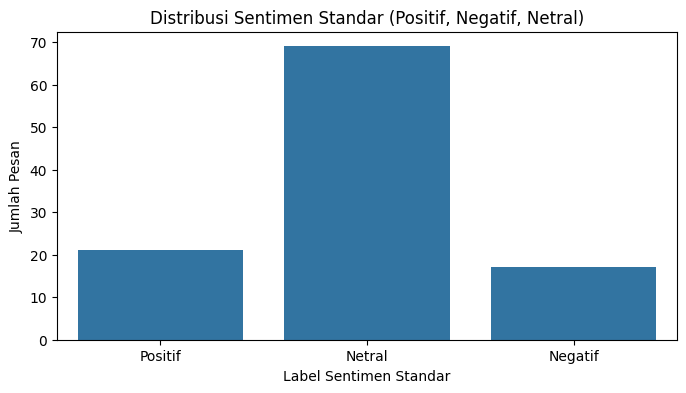

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df_data, x='sentimen', 
              order=['Positif', 'Netral', 'Negatif'])
plt.title('Distribusi Sentimen Standar (Positif, Negatif, Netral)')
plt.xlabel('Label Sentimen Standar')
plt.ylabel('Jumlah Pesan')
plt.show()

In [476]:
df_data.to_csv('../data/data_processed.csv', index=False)